In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
from PIL import Image, ImageEnhance

from skimage import data
from skimage.util.dtype import dtype_range
from skimage.util import img_as_ubyte
from skimage import exposure
from skimage.morphology import disk
from skimage.morphology import ball
from skimage.filters import rank

In [2]:
img = cv2.imread("Images/2/Camera Man.bmp", cv2.IMREAD_GRAYSCALE)

In [3]:
def imshow(*args, figsize=7, to_rgb=True, title=None, fontsize=12):
    if isinstance(figsize, int):
        figsize = (figsize, figsize)
    images = args[0] if type(args[0]) is list else list(args)
    if to_rgb:
        images = list(map(lambda x: cv2.cvtColor(x, cv2.COLOR_BGR2RGB), images))
    if title is not None:
        assert len(title) == len(images), "Please provide a title for each image."
    plt.figure(figsize=figsize)
    for i in range(1, len(images)+1):
        plt.subplot(1, len(images), i)
        if title is not None:
            plt.title(title[i-1], fontsize=fontsize)
        plt.imshow(images[i-1])
        plt.axis('off')

# 2.1.1

In [4]:
def program(img):
    return cv2.calcHist([img],[0],None,[256],[0,256])

In [5]:
dst = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

<StemContainer object of 3 artists>

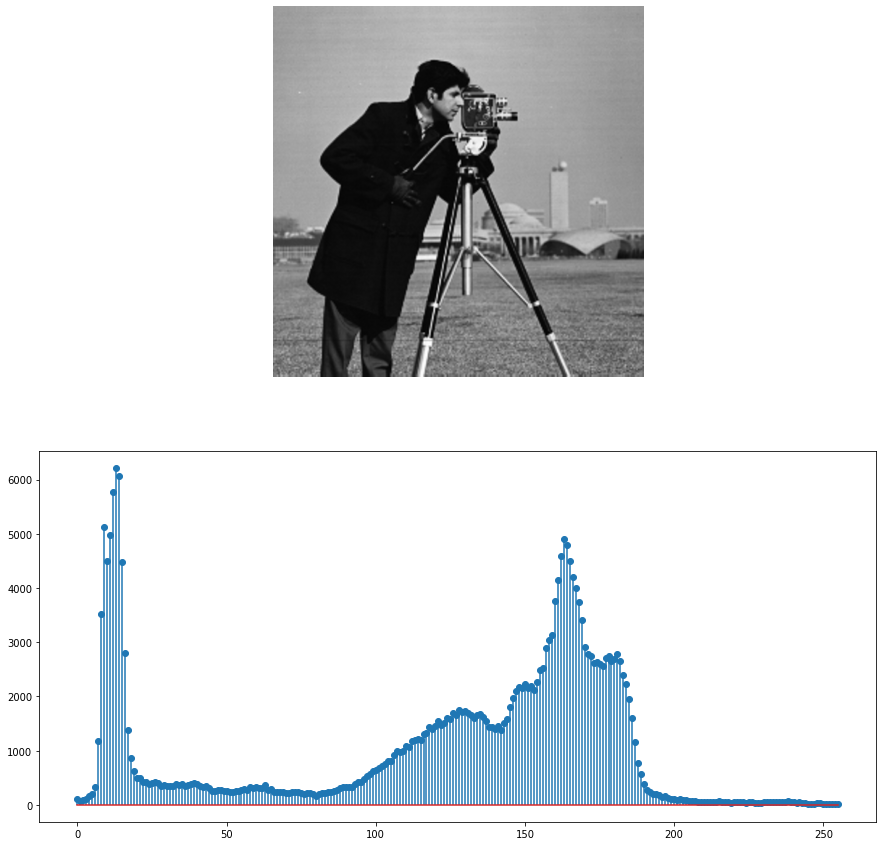

In [6]:
fig = plt.figure(figsize=(15, 15))
rows = 2
columns = 1

fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(dst)
plt.axis('off')

fig.add_subplot(rows, columns, 2)

plt.stem(program(img))

## 2.1.1.1

In [35]:
img2 = cv2.imread("Images/2/Camera Man.bmp")

In [36]:
def RGB_TO_HSI(img, brightness):

    with np.errstate(divide='ignore', invalid='ignore'):

        #Load image with 32 bit floats as variable type
        bgr = np.float32(img)/255

        #Separate color channels
        blue = bgr[:,:,0]
        green = bgr[:,:,1]
        red = bgr[:,:,2]

        #Calculate Intensity
        def calc_intensity(red, blue, green):
            return np.divide(blue + green + red, 3*brightness)

        #Calculate Saturation
        def calc_saturation(red, blue, green):
            minimum = np.minimum(np.minimum(red, green), blue)
            saturation = 1 - (3 / (red + green + blue + 0.001) * minimum)

            return saturation

        #Calculate Hue
        def calc_hue(red, blue, green):
            hue = np.copy(red)

            for i in range(0, blue.shape[0]):
                for j in range(0, blue.shape[1]):
                    hue[i][j] = 0.5 * ((red[i][j] - green[i][j]) + (red[i][j] - blue[i][j])) / \
                                math.sqrt((red[i][j] - green[i][j])**2 +
                                        ((red[i][j] - blue[i][j]) * (green[i][j] - blue[i][j])))
                    hue[i][j] = math.acos(hue[i][j])

                    if blue[i][j] <= green[i][j]:
                        hue[i][j] = hue[i][j]
                    else:
                        hue[i][j] = ((360 * math.pi) / 180.0) - hue[i][j]

            return hue

        #Merge channels into picture and return image
        hsi = cv2.merge((calc_hue(red, blue, green), calc_saturation(red, blue, green), calc_intensity(red, blue, green)))
        return hsi

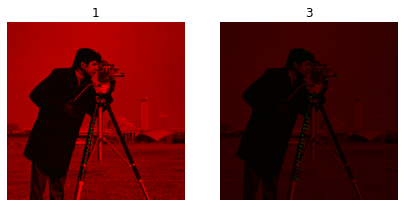

In [37]:
dst2 = RGB_TO_HSI(img2, 1)
D = RGB_TO_HSI(img2, 3)
imshow(dst2, D, title=['1', '3'])

In [10]:
# hsv = cv2.cvtColor(img2, cv2.COLOR_RGB2HSV)
# hsv[:,:,2] /= 3
# dst3 = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
# imshow(dst3)

UFuncTypeError: Cannot cast ufunc 'divide' output from dtype('float64') to dtype('uint8') with casting rule 'same_kind'

In [11]:
im = Image.open("Images/2/Camera Man.bmp")

enhancer = ImageEnhance.Brightness(im)

factor = 0.3 #darkens the image
im_output = enhancer.enhance(factor)
im_output.save('darkened-image.png')

## 2.1.1.2

<StemContainer object of 3 artists>

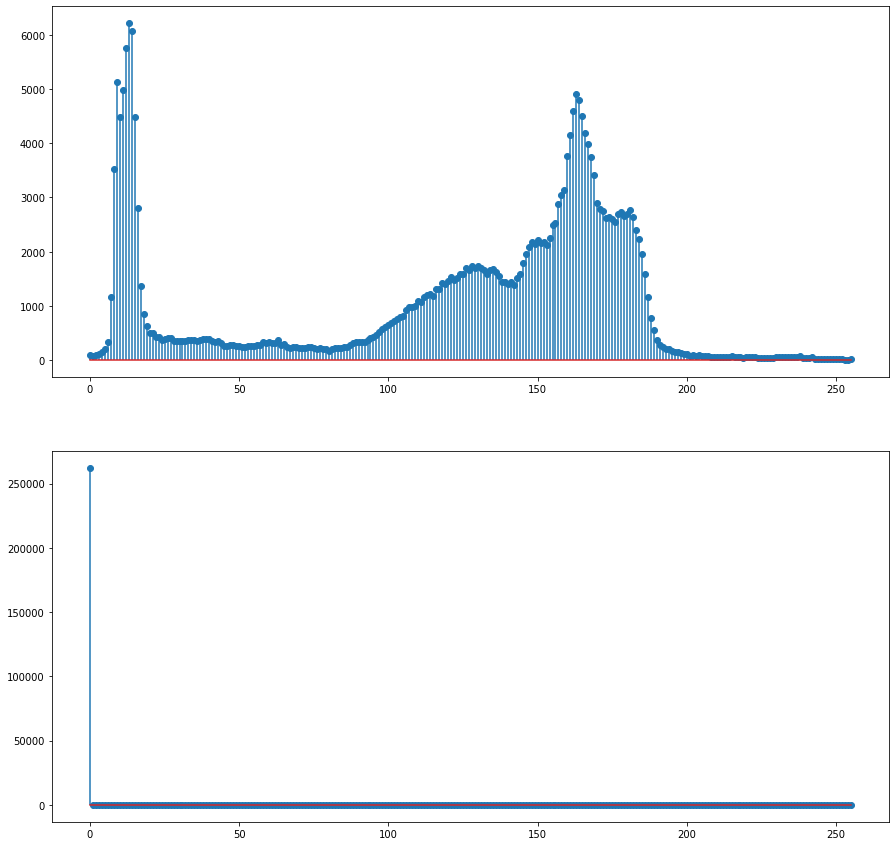

In [12]:
fig2 = plt.figure(figsize=(15, 15))
rows = 2
columns = 1

fig2.add_subplot(rows, columns, 1)
plt.stem(program(img2))

fig2.add_subplot(rows, columns, 2)
plt.stem(program(D))


## 2.1.1.3

In [31]:
H = cv2.equalizeHist(D)

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-q3d_8t8e\opencv\modules\imgproc\src\histogram.cpp:3439: error: (-215:Assertion failed) _src.type() == CV_8UC1 in function 'cv::equalizeHist'


## 2.1.1.4

In [68]:
clah = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
L = clah.apply(D)

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-q3d_8t8e\opencv\modules\imgproc\src\clahe.cpp:353: error: (-215:Assertion failed) _src.type() == CV_8UC1 || _src.type() == CV_16UC1 in function '`anonymous-namespace'::CLAHE_Impl::apply'


# 2.1.2

In [28]:
def program2(img):
    fig = plt.figure(figsize=(15, 15))
    rows = 2
    columns = 2

    fig.add_subplot(rows, columns, 1)
    img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img1)
    plt.axis('off')

    fig.add_subplot(rows, columns, 2)
    plt.stem(program(img))
    
    img_eq = cv2.equalizeHist(img)

    fig.add_subplot(rows, columns, 3)
    img2 = cv2.cvtColor(img_eq, cv2.COLOR_BGR2RGB)
    plt.imshow(img2)
    plt.axis('off')

    fig.add_subplot(rows, columns, 4)
    plt.stem(program(img_eq))

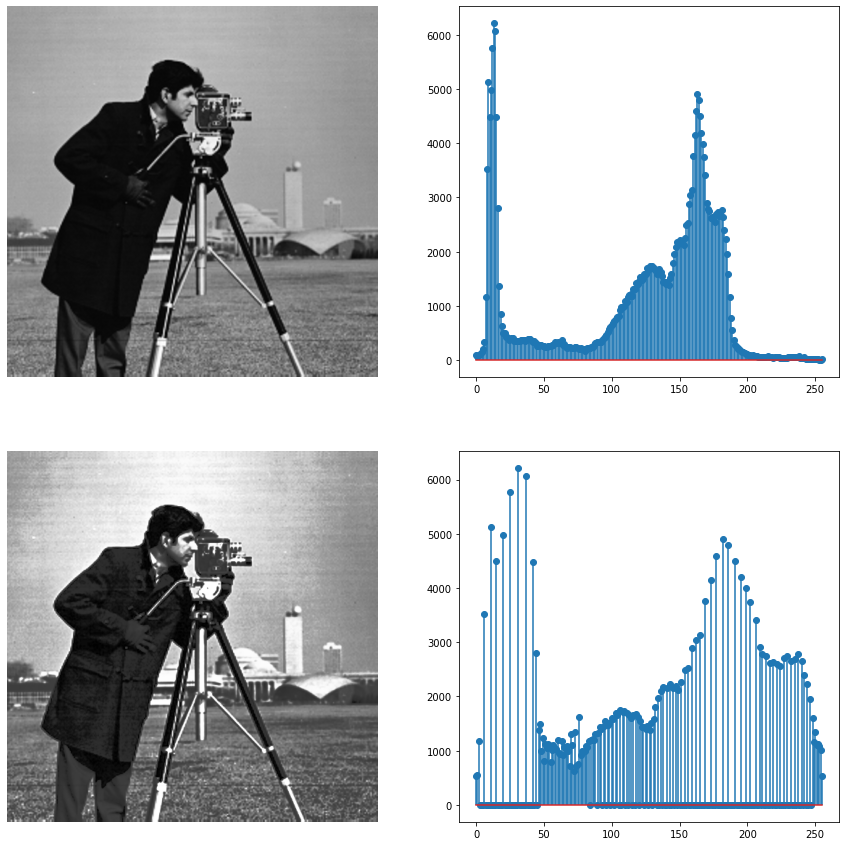

In [29]:
program2(img)

# 2.2

In [48]:
image1 = cv2.imread("Images/2/HE1.jpg", cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread("Images/2/HE2.jpg", cv2.IMREAD_GRAYSCALE)
image3 = cv2.imread("Images/2/HE3.jpg", cv2.IMREAD_GRAYSCALE)
image4 = cv2.imread("Images/2/HE4.jpg", cv2.IMREAD_GRAYSCALE)

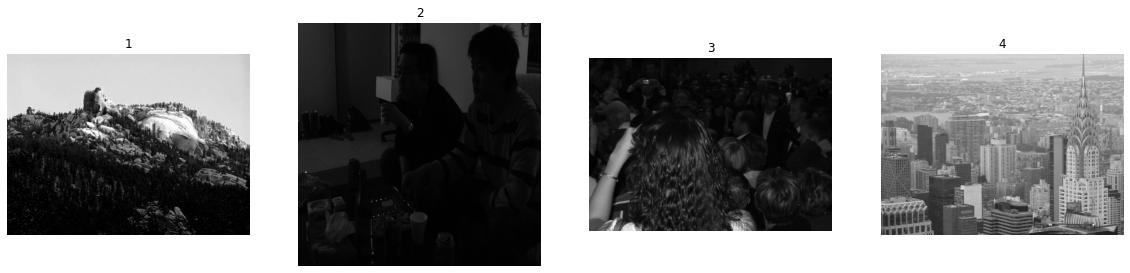

In [60]:
imshow(image1, image2, image3, image4, title=['1', '2', '3', '4'], figsize=20)

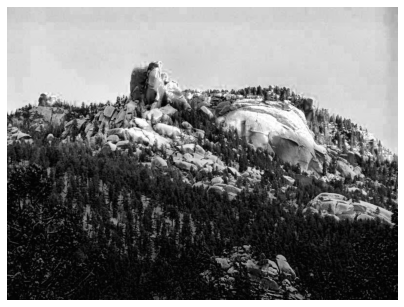

In [61]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
equalized = clahe.apply(image1)
imshow(equalized)

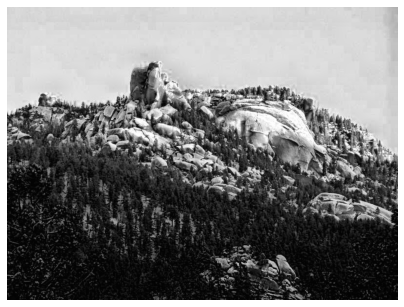

In [74]:
clahe2 = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(20, 20))
equalized12 = clahe2.apply(image1)
imshow(equalized12)

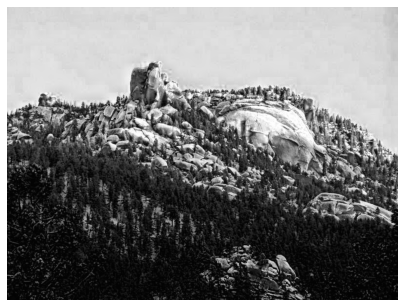

In [90]:
clahe3 = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(40, 40))
equalized13 = clahe3.apply(image1)
imshow(equalized13)

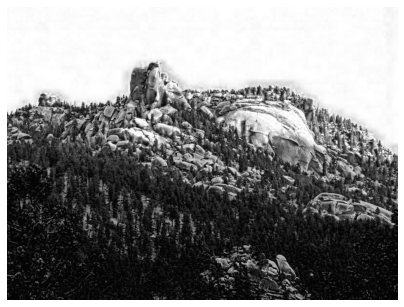

In [91]:
clahe4 = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(60, 60))
equalized14 = clahe4.apply(image1)
imshow(equalized14)

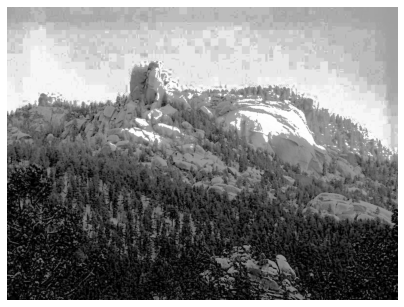

In [92]:
equalized15 = cv2.equalizeHist(image1)
imshow(equalized15)

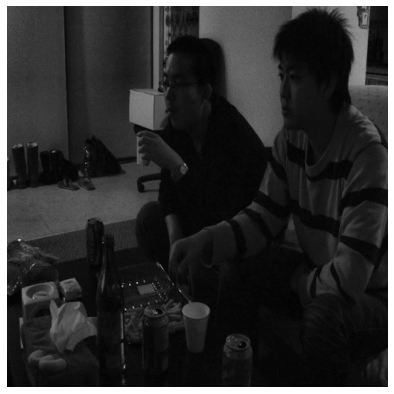

In [62]:
equalized2 = clahe.apply(image2)
imshow(equalized2)

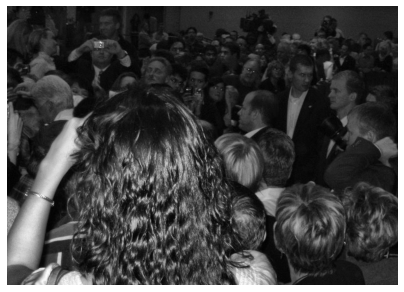

In [63]:
equalized3 = clahe.apply(image3)
imshow(equalized3)

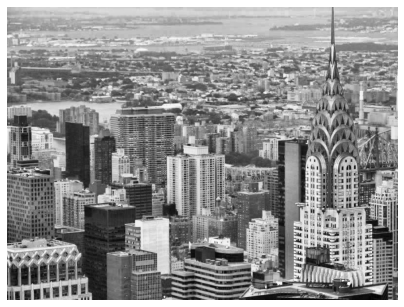

In [64]:
equalized4 = clahe.apply(image4)
imshow(equalized4)